In [ ]:
# HEART DISEASE (CHD) PREDICTION - FRAMINGHAM STUDY

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report, log_loss
)
import joblib

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/framingham.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df["education"] = df["education"].fillna(df["education"].median())
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].median())
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].median())
df["totChol"] = df["totChol"].fillna(df["totChol"].median())
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["glucose"] = df["glucose"].fillna(df["glucose"].median())

In [ ]:
## checking NULL values
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
# Shape and column overview
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

Dataset shape: (4240, 16)

Columns:
 ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [ ]:
# Unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

male: 2 unique values
age: 39 unique values
education: 4 unique values
currentSmoker: 2 unique values
cigsPerDay: 33 unique values
BPMeds: 2 unique values
prevalentStroke: 2 unique values
prevalentHyp: 2 unique values
diabetes: 2 unique values
totChol: 248 unique values
sysBP: 234 unique values
diaBP: 146 unique values
BMI: 1365 unique values
heartRate: 74 unique values
glucose: 143 unique values
TenYearCHD: 2 unique values


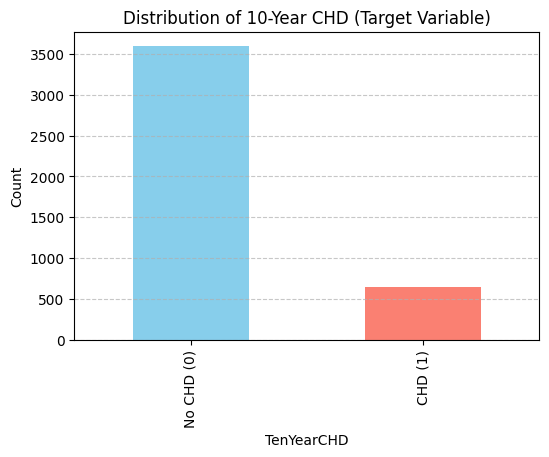


CHD Percentage Distribution:
TenYearCHD
0    84.811321
1    15.188679
Name: proportion, dtype: float64


In [ ]:
# EXPLORATORY DATA ANALYSIS (EDA)
# Target Variable
plt.figure(figsize=(6,4))
df["TenYearCHD"].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribution of 10-Year CHD (Target Variable)")
plt.xticks([0,1], ['No CHD (0)', 'CHD (1)'])
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nCHD Percentage Distribution:")
print(df["TenYearCHD"].value_counts(normalize=True)*100)

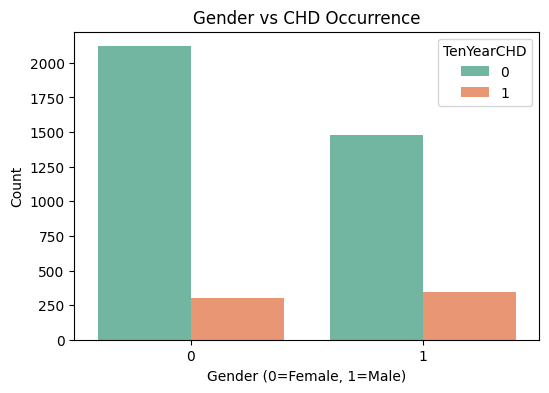


CHD rate by gender:
male
0    0.124380
1    0.188462
Name: TenYearCHD, dtype: float64


In [ ]:
# Gender vs CHD
plt.figure(figsize=(6,4))
sns.countplot(x='male', hue='TenYearCHD', data=df, palette='Set2')
plt.title("Gender vs CHD Occurrence")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.show()

print("\nCHD rate by gender:")
print(df.groupby('male')['TenYearCHD'].mean())

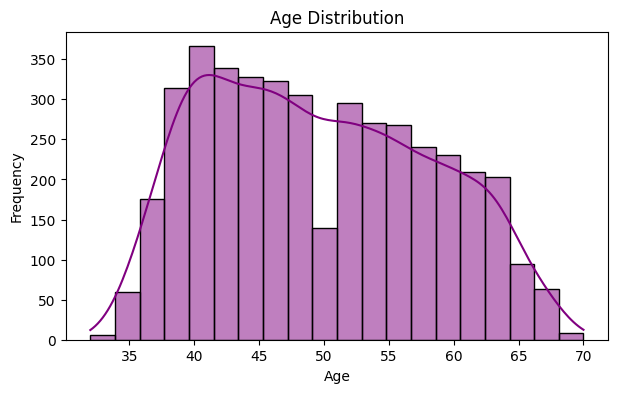

In [ ]:
# Age Distribution
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True, color='purple')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-3858756196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='age', data=df, palette='coolwarm')


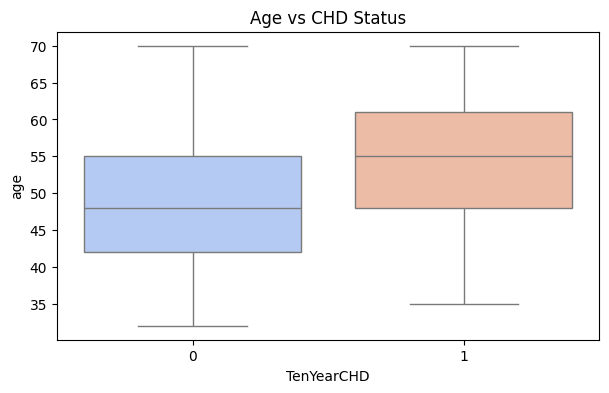

In [ ]:
# Age vs CHD
plt.figure(figsize=(7,4))
sns.boxplot(x='TenYearCHD', y='age', data=df, palette='coolwarm')
plt.title("Age vs CHD Status")
plt.show()

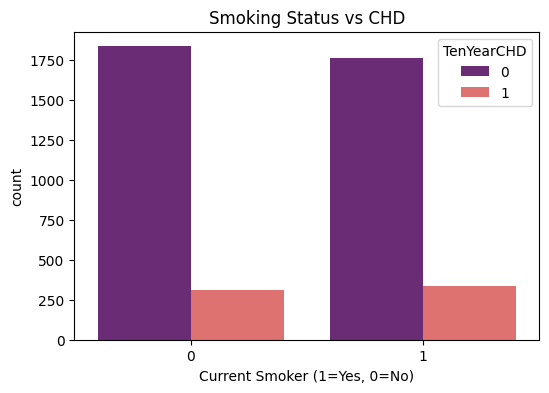

/tmp/ipython-input-2542359428.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df, palette='viridis')


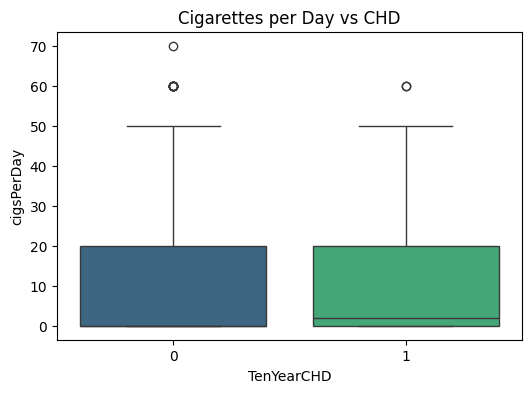

In [ ]:
# ---- Smoking ----
plt.figure(figsize=(6,4))
sns.countplot(x='currentSmoker', hue='TenYearCHD', data=df, palette='magma')
plt.title("Smoking Status vs CHD")
plt.xlabel("Current Smoker (1=Yes, 0=No)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='TenYearCHD', y='cigsPerDay', data=df, palette='viridis')
plt.title("Cigarettes per Day vs CHD")
plt.show()

/tmp/ipython-input-2293857824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='sysBP', data=df, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-2293857824.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='diaBP', data=df, ax=axes[1], palette='coolwarm')


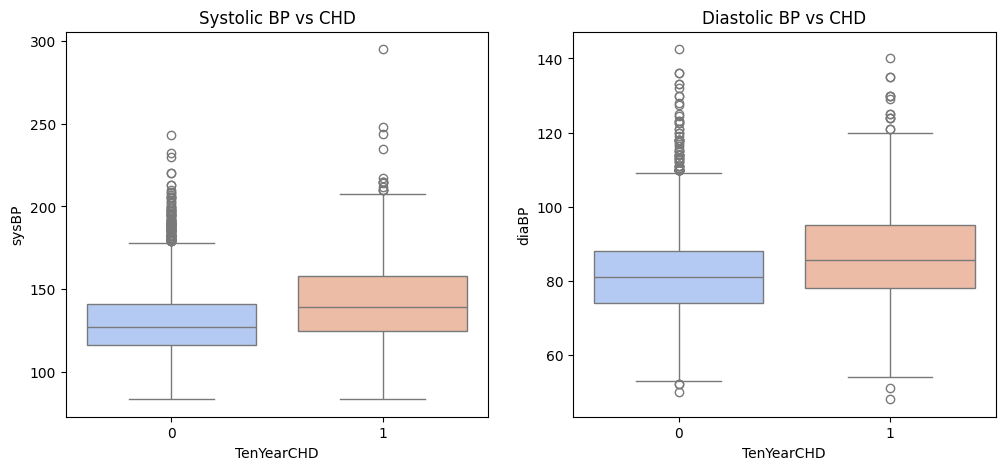

In [ ]:
# Blood Pressure
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("Systolic BP vs CHD")
sns.boxplot(x='TenYearCHD', y='diaBP', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("Diastolic BP vs CHD")
plt.show()

/tmp/ipython-input-709712839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Spectral')


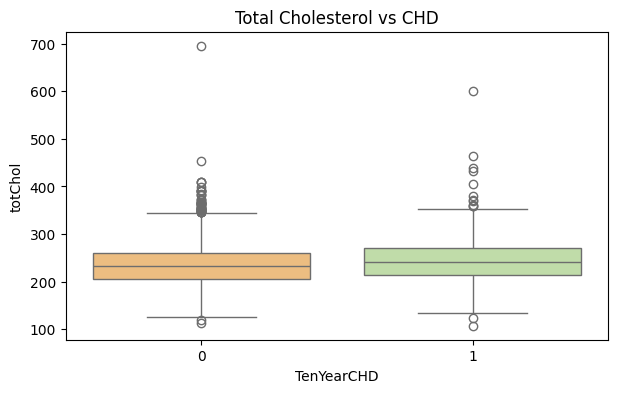

In [ ]:
# ---- Cholesterol ----
plt.figure(figsize=(7,4))
sns.boxplot(x='TenYearCHD', y='totChol', data=df, palette='Spectral')
plt.title("Total Cholesterol vs CHD")
plt.show()

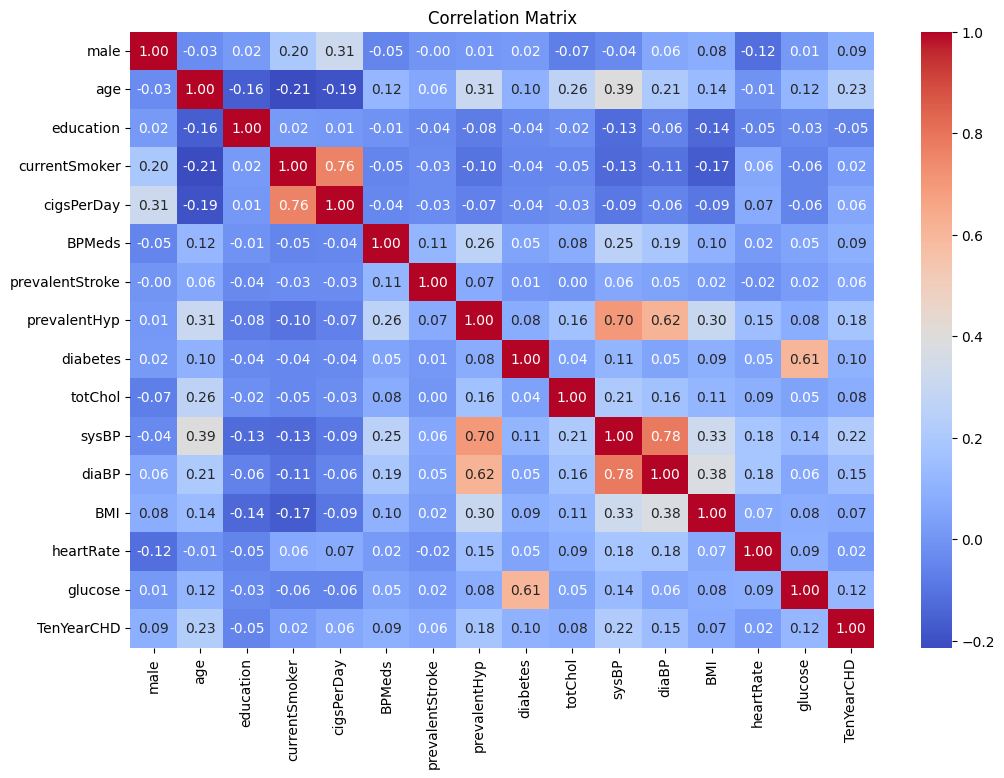

In [ ]:
# ---- Correlation Heatmap ----
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# ---- Top correlated features with CHD ----
corr = df.corr()['TenYearCHD'].sort_values(ascending=False)
print("\nTop correlated features with TenYearCHD:\n", corr)


Top correlated features with TenYearCHD:
 TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.121319
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081749
BMI                0.074788
prevalentStroke    0.061823
cigsPerDay         0.058729
heartRate          0.022892
currentSmoker      0.019448
education         -0.053570
Name: TenYearCHD, dtype: float64


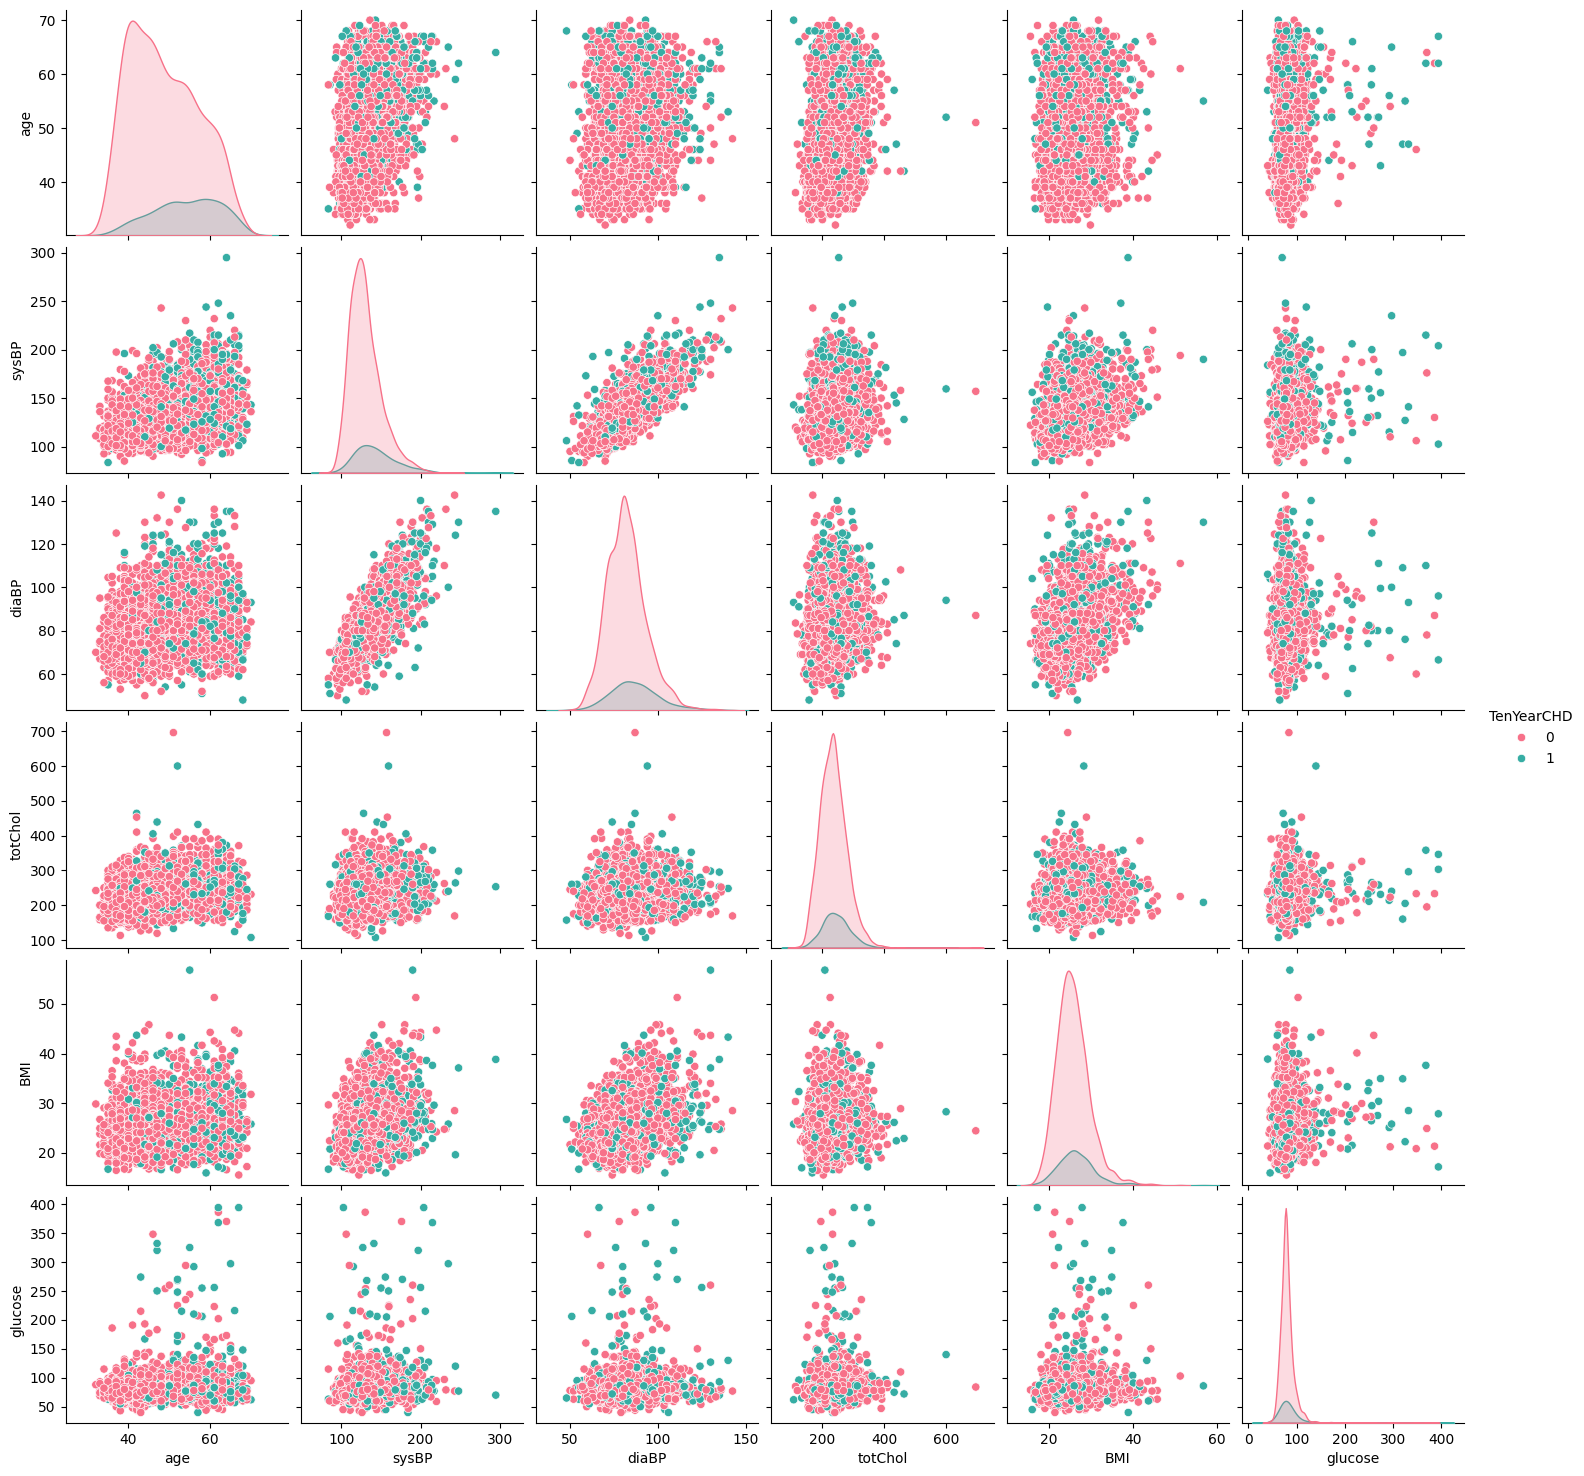

In [ ]:
# Pairplot for important features
important_features = ['age', 'sysBP', 'diaBP', 'totChol', 'BMI', 'glucose', 'TenYearCHD']
sns.pairplot(df[important_features], hue='TenYearCHD', palette='husl')
plt.show()

In [ ]:
# MODEL BUILDING
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train CHD rate:", y_train.mean())
print("Test CHD rate:", y_test.mean())



Train shape: (2968, 15)
Test shape: (1272, 15)
Train CHD rate: 0.15195417789757412
Test CHD rate: 0.15172955974842767


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# Logistic Regression
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    solver='lbfgs'
)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# ---- Evaluation ----
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:,1]

In [ ]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)
ll   = log_loss(y_test, y_proba)

print("\n=== Model Performance on Test Set ===")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC AUC:   {auc:.4f}")
print(f"Log Loss:  {ll:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


=== Model Performance on Test Set ===
Accuracy:  0.6714
Precision: 0.2560
Recall:    0.6114
F1-score:  0.3609
ROC AUC:   0.7005
Log Loss:  0.6108

Classification Report:

              precision    recall  f1-score   support

           0     0.9075    0.6821    0.7788      1079
           1     0.2560    0.6114    0.3609       193

    accuracy                         0.6714      1272
   macro avg     0.5817    0.6468    0.5698      1272
weighted avg     0.8087    0.6714    0.7154      1272



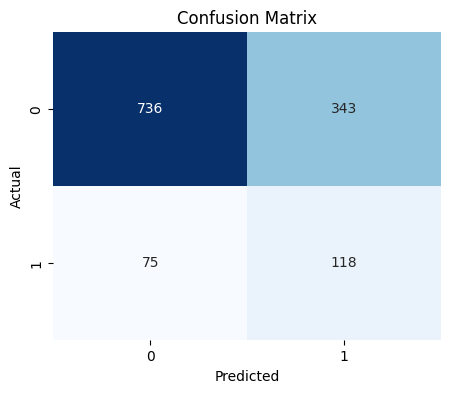

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

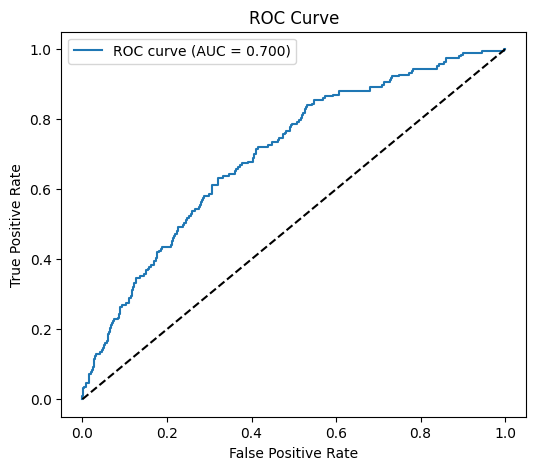

In [ ]:
# ---- ROC Curve ----
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# ---- Feature Importance ----
coef = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
print("\nTop 10 features by absolute logistic coefficient:")
print(coef.head(10))


Top 10 features by absolute logistic coefficient:
age                0.634069
cigsPerDay         0.311352
sysBP              0.234974
male               0.192961
glucose            0.139962
totChol            0.135071
BPMeds             0.104639
prevalentStroke    0.093222
prevalentHyp       0.073278
heartRate         -0.066814
dtype: float64


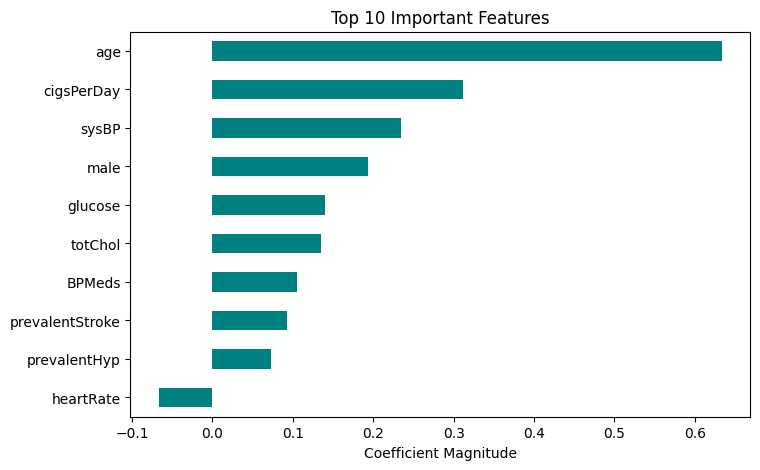

In [ ]:
plt.figure(figsize=(8,5))
coef.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Important Features")
plt.xlabel("Coefficient Magnitude")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#  PREDICT NEW PATIENT
# ================================================
new_patient = pd.DataFrame({
    'male': [1],
    'age': [55],
    'education': [2],
    'currentSmoker': [1],
    'cigsPerDay': [10],
    'BPMeds': [0],
    'prevalentStroke': [0],
    'prevalentHyp': [1],
    'diabetes': [0],
    'totChol': [250],
    'sysBP': [140],
    'diaBP': [90],
    'BMI': [27.5],
    'heartRate': [80],
    'glucose': [85]
})

In [ ]:
# Ensure same column order and scaling
new_scaled = scaler.transform(new_patient[X.columns])
prob = log_model.predict_proba(new_scaled)[0,1]
pred_class = (prob >= 0.5).astype(int)

print(f"\n🧍 New Patient CHD Probability: {prob*100:.2f}%")
print("Predicted CHD Class (0 = No, 1 = Yes):", pred_class)


🧍 New Patient CHD Probability: 64.15%
Predicted CHD Class (0 = No, 1 = Yes): 1


In [ ]:
import joblib

joblib.dump(log_model, "heart_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!
